In [13]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
raw_data_dir = '../data/raw_imgs/LIS-fingerspelling-dataset'
img_ex = cv2.imread(os.path.join(raw_data_dir, 'a', 'a_ANTONIA_1_bottom.JPG'))
img_ex.shape

(415, 622, 3)

In [15]:
dataset_raw = tf.keras.utils.image_dataset_from_directory(
    raw_data_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

data_iterator = dataset_raw.as_numpy_iterator()
data_iterator

Found 7078 files belonging to 24 classes.


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f6e70282710>)

In [16]:
train_split_dir = '../data/raw_imgs/splits/train'
val_split_dir = '../data/raw_imgs/splits/val'
test_split_dir = '../data/raw_imgs/splits/test'

train_raw = tf.keras.utils.image_dataset_from_directory(
    train_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

test_raw = tf.keras.utils.image_dataset_from_directory(
    test_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

val_raw = tf.keras.utils.image_dataset_from_directory(
    val_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

train_iterator = train_raw.as_numpy_iterator()
test_iterator = test_raw.as_numpy_iterator()
val_iterator = val_raw.as_numpy_iterator()

train_iterator, test_iterator, val_iterator

Found 5654 files belonging to 24 classes.
Found 719 files belonging to 24 classes.
Found 705 files belonging to 24 classes.


(NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f6e702fcac0>),
 NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f6eb7fa87c0>),
 NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f6eb7fa8400>))

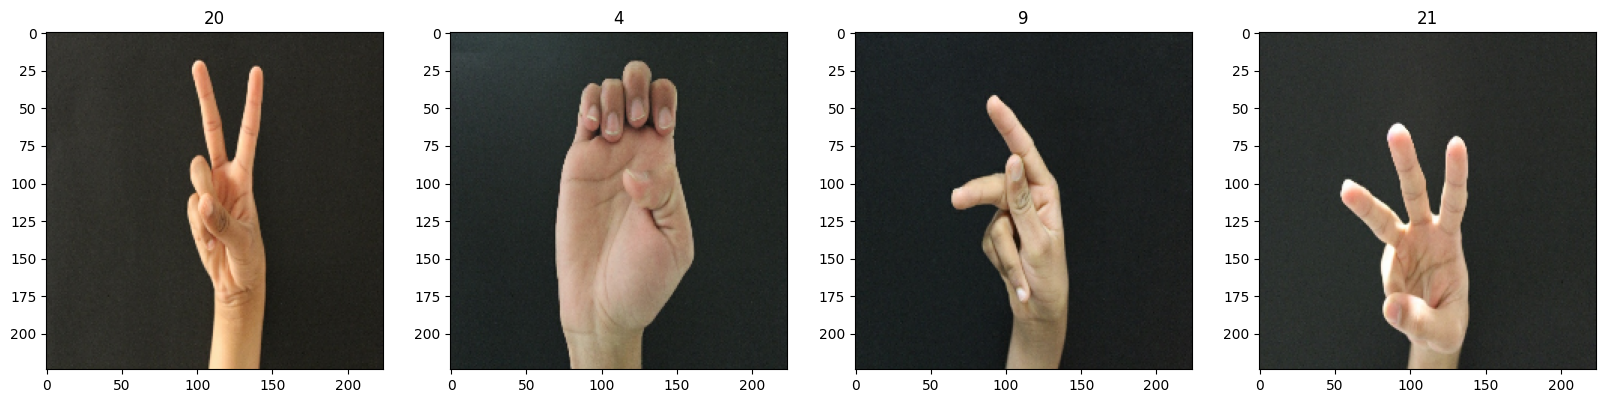

In [17]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

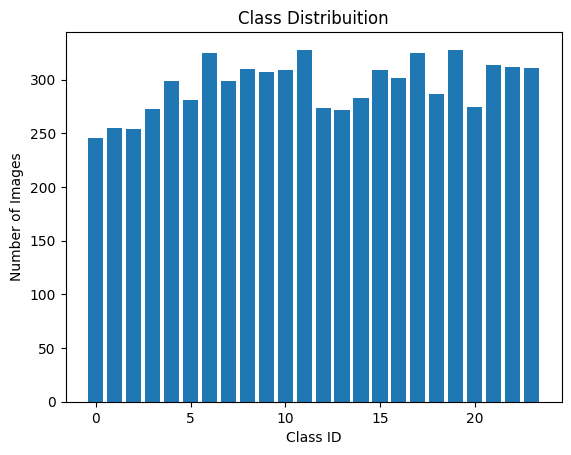

In [18]:
all_labels = []

for _, labels in dataset_raw:
    all_labels.extend(labels.numpy())

label_counts = Counter(all_labels)

# Plot labels distribuition
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribuition")
plt.show()